In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Break Powers:  [ 5406.   9341.  25461.  57102.5] kW


Text(0, 0.5, 'BHP [MW]')

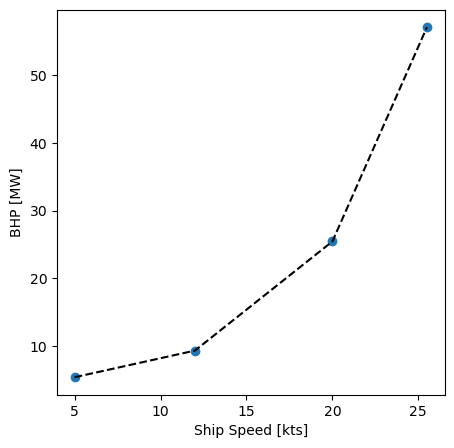

In [113]:
speeds = np.array([5, 12, 20, 25.5])
duration_frac = np.array([.2, .6, .15, .05])
num_days_underway = 183
break_powers = np.array([5406, 9341, 25461, (62154 + 52051)/2]) # kW
print('Break Powers: ', break_powers, 'kW')
#print('Break Powers: ', np.round(break_powers*1.34102, 2), 'HP')
plt.figure(figsize=(5,5))
plt.plot(speeds, break_powers/1000, 'k--')
plt.scatter(speeds, break_powers/1000)
plt.xlabel('Ship Speed [kts]')
plt.ylabel('BHP [MW]')

Text(0, 0.5, 'Days per Year')

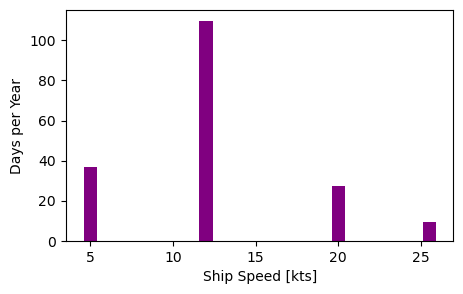

In [114]:
plt.figure(figsize=(5,3))
plt.bar(speeds, num_days_underway*duration_frac, color='purple')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Days per Year')

shift:  47
For the following powers: [ 5406.   9341.  25461.  57102.5]
The MCR is                [  9.467  16.358  44.588 100.   ] %
mdots: [0.69377    1.15984083 2.4541575  4.58406181] kg/s
m_steam: [ 2193.8672448 11003.0852304  5820.4762596  3623.975901 ] Ton
Total fuel used in the propulsion fuel rate is: 22641.404635799998 Ton


Text(0.5, 1.0, 'Total Fuel Used by Propulsion: 22641.4 Ton')

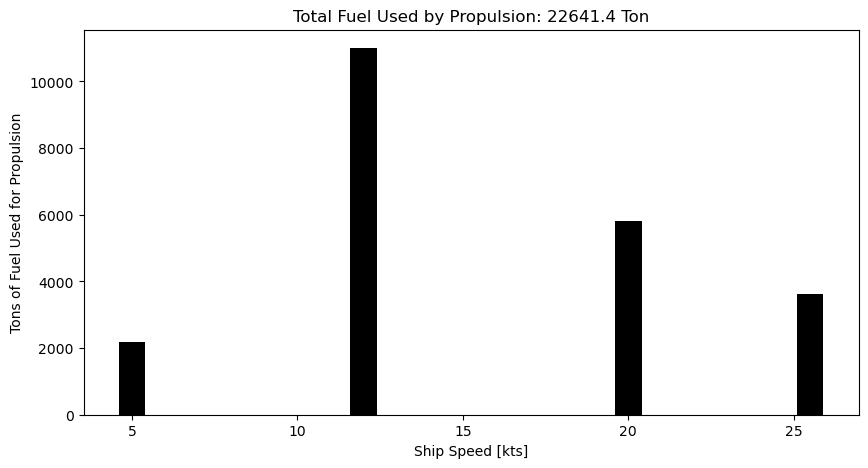

In [138]:
# Steam Section 
sfc_100_steam = 289 # g/kwhr
sfc_100_ssg = 242
shift = sfc_100_steam - sfc_100_ssg
print('shift: ',shift)
fraction_load = break_powers / break_powers[-1]
print(f'For the following powers: {break_powers}')
print(f'The MCR is                {np.round(fraction_load*100, 3)} %')
sfc_steam = np.array([415, 400, 300, 242]) + shift

# calculate the fuel rates at certain speeds 
mdot_steam = sfc_steam*(1/60**2)*(1/1000)*break_powers
print(f'mdots: {mdot_steam} kg/s')

m_steam_annual = mdot_steam*num_days_underway*duration_frac*24*60**2
print(f'm_steam: {m_steam_annual/1000} Ton')
mtot_steam = np.sum(m_steam_annual)

print(f'Total fuel used in the propulsion fuel rate is: {mtot_steam/1000} Ton')

plt.figure(figsize=(10,5))
plt.bar(speeds, m_steam_annual/1000, color='black')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Tons of Fuel Used for Propulsion')
plt.title(f'Total Fuel Used by Propulsion: {np.round(mtot_steam/1000, 2)} Ton')



In [80]:
# As-is electrical generation 

P_avg_el = 4747 # kW
P_WB = 7272 # kW

num_steam_elec = 5
num_diesel_elec = 2

# operation powers
P_steam_elec_100 = 2500
P_diesel_elec_100 = 2000

# total_installed_electric_capacity = num_steam_elec*P_steam_elec_100 + num_diesel_elec*P_diesel_elec_100
# print(f'Total installed electrical power: {total_installed_electric_capacity} kW')

# P_steam_elec_avg = (P_steam_elec_100/total_installed_electric_capacity)*P_avg_el
# print(f'Power per steam engine: {P_steam_elec_avg} kW')
# MCR_steam_elec_avg = P_steam_elec_avg/P_steam_elec_100
# print(f'MCR for steam electric power plant at average load: {MCR_steam_elec_avg}')
# sfc_steam_elec = 325 + shift
# print(f'sfc for steam electric generator: {sfc_steam_elec}')
# # total fuel mass used by the 5 steam electric generators
# m_steam_elec = sfc_steam_elec/(1000*60**2)*P_steam_elec_avg*num_days_underway*24*60**2
# print(f'Total fuel used to supply steam electric power generator: {m_steam_elec/1000} Ton')

# print('\n----------------')
# P_diesel_elec_avg = (P_diesel_elec_100/total_installed_electric_capacity)*P_avg_el
# print(f'Power per diesel engine: {P_diesel_elec_avg} kW')
# MCR_diesel_elec_avg = P_diesel_elec_avg/P_diesel_elec_100
# print(f'MCR for diesel electric power plant at average load: {MCR_diesel_elec_avg}')

endurance_percent = 0.9
winter_battle_percent = 1- endurance_percent

# Endurance speed section 
P_steam_elec_avg = P_avg_el/(num_steam_elec-1)
print(f'Power per steam engine: {P_steam_elec_avg} kW')
MCR_steam_elec_avg = P_steam_elec_avg/P_steam_elec_100
print(f'MCR for steam electric power plant at average load: {MCR_steam_elec_avg}')

sfc_steam_elec_avg = 280 + shift
print(f'sfc for steam electric generator during endurance operation: {sfc_steam_elec_avg}')
m_steam_elec_avg = sfc_steam_elec_avg/(1000*60**2)*P_avg_el*(num_days_underway*endurance_percent)*24*60**2
print(f'Total fuel used to supply steam electric power generator at endurance: {m_steam_elec_avg/1000} Ton')

print('\n-----')
# winter battle section 
P_steam_elec_WB = P_WB/(num_steam_elec-1)
print(f'Power per steam engine for WB: {P_steam_elec_WB} kW')
MCR_steam_elec_WB = P_steam_elec_WB/P_steam_elec_100
print(f'MCR for steam electric power plant at WB load: {MCR_steam_elec_WB}')

sfc_steam_elec_WB = 260 + shift
print(f'sfc for steam electric generator during WB operation: {sfc_steam_elec_WB}')
m_steam_elec_WB = sfc_steam_elec_WB/(1000*60**2)*P_WB*(num_days_underway*winter_battle_percent)*24*60**2
print(f'Total fuel used to supply steam electric power generator WB: {m_steam_elec_WB/1000} Ton')

print('\n-----')
print(f'Total fuel used by electric generators annually: {(m_steam_elec_WB + m_steam_elec_avg)/1000} Ton ')

print('\n-----')
m_grand_total_steam = m_steam_elec_WB + m_steam_elec_avg + mtot_steam
print(f'Grand Total fuel used by ship: {(m_grand_total_steam)/1000} Ton ')

Power per steam engine: 1186.75 kW
MCR for steam electric power plant at average load: 0.4747
sfc for steam electric generator during endurance operation: 289
Total fuel used to supply steam electric power generator at endurance: 5422.779122399999 Ton

-----
Power per steam engine for WB: 1818.0 kW
MCR for steam electric power plant at WB load: 0.7272
sfc for steam electric generator during WB operation: 269
Total fuel used to supply steam electric power generator WB: 859.1489856 Ton

-----
Total fuel used by electric generators annually: 6281.928108 Ton 

-----
Grand Total fuel used by ship: 28923.332743799994 Ton 


In [88]:
# Pollution Section 

CO2_frac = .85*44/12
print(f'CO2_fac: {CO2_frac}')
total_CO2_emission_steam = m_grand_total_steam*CO2_frac
print(f'Emitted CO2: {total_CO2_emission_steam/1000} Ton')

SOx_frac = .01*(32+32)/32
print(f'SOx_fac: {SOx_frac}')
total_SOx_emission_steam = m_grand_total_steam*SOx_frac
print(f'Emitted SOx: {total_SOx_emission_steam/1000} Ton')

# NOx section 

print('\n----------')
print('NOx Section\n')
print(f'Recal the MCR for the main engines is {fraction_load*100} %')
noxers = fraction_load*100*0.16 + 2
print(f'noxers: {noxers}')

mass_nox_primary = noxers*m_steam_annual/1000**2 # mass of nox in Ton
print('Mass of NOx emission in Tons: ', mass_nox_primary)
total_NOx_emission = sum(mass_nox_primary)
print(f'Mass of NOx emitted total from propulstion: {total_NOx_emission} Ton')


print('\n-----')
# NOx emitted by the electic system 
# recall for the WB mass, the MCR = 0.727, and for the standard operation, MCR = 0.475
MCR_elec = np.array([MCR_steam_elec_avg, MCR_steam_elec_WB])
noxers_elec = MCR_elec*100*0.16 + 2
mass_used_elec = np.array([m_steam_elec_avg, m_steam_elec_WB])
mass_nox_elec = noxers_elec*mass_used_elec/1000**2 # mass of nox in Ton
print('electric MCRs: ', MCR_elec)
print('electric noxers: ', noxers_elec)
print('Mass of NOx emitted by electric generation in Ton: ', mass_nox_elec)
total_NOx_emission_elec = sum(mass_nox_elec)
print(f'Mass of NOx emitted total from electric: {total_NOx_emission_elec} Ton')

print('\n------')
print('Grand Total NOx in Ton: ', total_NOx_emission_elec+total_NOx_emission)

CO2_fac: 3.1166666666666667
Emitted CO2: 90144.38705150998 Ton
SOx_fac: 0.02
Emitted SOx: 578.4666548759999 Ton

----------
NOx Section

Recal the MCR for the main engines is [  9.4671862   16.35830305  44.58824044 100.        ] %
noxers: [ 3.51474979  4.61732849  9.13411847 18.        ]
Mass of NOx emission in Tons:  [ 7.71089444 50.80485889 53.16491971 65.23156622]
Mass of NOx emitted total from propulstion: 176.91223926715767 Ton

-----
electric MCRs:  [0.4747 0.7272]
electric noxers:  [ 9.5952 13.6352]
Mass of NOx emitted by electric generation in Ton:  [52.03265024 11.71466825]
Mass of NOx emitted total from electric: 63.74731848370559 Ton

------
Grand Total NOx in Ton:  240.65955775086326


Text(0.5, 1.0, 'Total NOx Emitted by Steam Propulsion: 176.91 Ton')

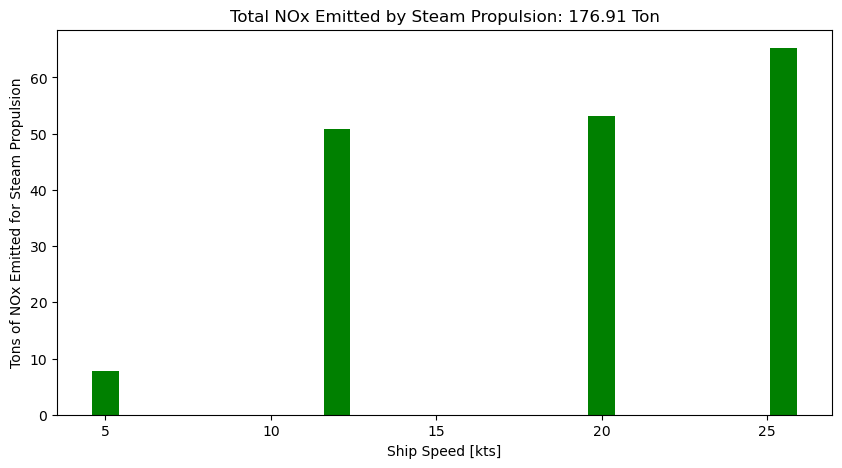

In [89]:
plt.figure(figsize=(10,5))
plt.bar(speeds, mass_nox_primary, color='green')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Tons of NOx Emitted for Steam Propulsion')
plt.title(f'Total NOx Emitted by Steam Propulsion: {np.round(sum(mass_nox_primary), 2)} Ton')

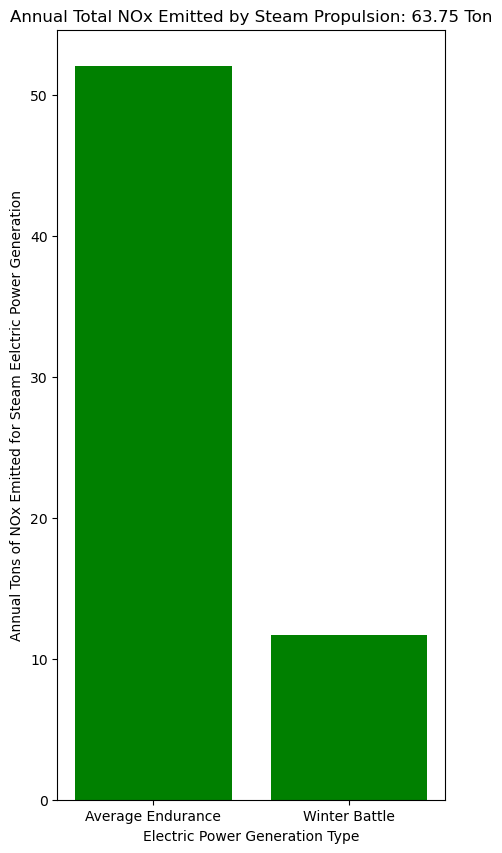

In [90]:
DayOfWeekOfCall = [1,2]

LABELS = ["Average Endurance", "Winter Battle"]
plt.figure(figsize=(5, 10))
plt.bar(DayOfWeekOfCall, mass_nox_elec, align='center', color='green')
plt.xticks(DayOfWeekOfCall, LABELS)
plt.xlabel('Electric Power Generation Type')
plt.ylabel('Annual Tons of NOx Emitted for Steam Eelctric Power Generation')
plt.title(f'Annual Total NOx Emitted by Steam Propulsion: {np.round(sum(mass_nox_elec), 2)} Ton')
plt.show()

In [91]:
MCR_war = np.zeros_like(break_powers)
sfc_war = np.zeros_like(break_powers)
mdot_war = np.zeros_like(break_powers)
m_war_annual = np.zeros_like(break_powers)
co2_annual = np.zeros_like(break_powers)
sox_annual = np.zeros_like(break_powers)
nox_annual = np.zeros_like(break_powers)
noxer_war = np.zeros_like(break_powers)

# Titan gas turbines
MCR_titan = np.zeros_like(break_powers)
sfc_titan  = np.zeros_like(break_powers)
mdot_titan = np.zeros_like(break_powers)
m_titan_annual = np.zeros_like(break_powers)
noxer_titan = np.zeros_like(break_powers)


In [92]:
# Speed 0
index = 0
num_war_engines = 2
P_B = break_powers[index]
vs = speeds[index]
print(f'The break power at vs = {vs} kts is PB = {P_B} kW')
P_war_100 = 5200 # kW max power of each Warstilla 31 V8 engine
MCR_war[index] = (P_B/num_war_engines)/P_war_100
print(f'The MCR of each Warstilla engine is {MCR_war[index]*100} %')
sfc_war[index] = 180

mdot_war[index] = sfc_war[index]*(1/60**2)*(1/1000)*P_B
print(f'mdot: {mdot_war[index]} kg/s')

m_war_annual[index] = mdot_war[index]*num_days_underway*duration_frac[index]*24*60**2
print(f'm_war: {m_war_annual[index]/1000} Ton')

# CO2 and SOx section 
co2_annual[index] = m_war_annual[index]*CO2_frac  # in kg
print(f'Emitted CO2: {co2_annual[index]/1000} Ton')

sox_annual[index] = m_war_annual[index]*SOx_frac
print(f'Emitted SOx: {sox_annual[index]/1000} Ton')

# NOx section 
noxer_war[index] = 71 # g NOx / kg fuel 
nox_annual[index] = noxer_war[index]*m_war_annual[index]/1000 # convert to kg

print(f'Emitted NOx: {nox_annual[index]/1000} Ton')





The break power at vs = 5.0 kts is PB = 5406.0 kW
The MCR of each Warstilla engine is 51.98076923076923 %
mdot: 0.27030000000000004 kg/s
m_war: 854.7534720000001 Ton
Emitted CO2: 2663.9816544000005 Ton
Emitted SOx: 17.095069440000003 Ton
Emitted NOx: 60.687496512 Ton


In [93]:
index = 1
num_war_engines = 2
P_B = break_powers[index]
vs = speeds[index]
print(f'The break power at vs = {vs} kts is PB = {P_B} kW')# Speed 1 # Two deisel Warsilla engines still 


MCR_war[index] = (P_B/2)/P_war_100
print(f'The MCR of each Warstilla engine is {MCR_war[index]*100} %')
sfc_war[index] = 170

mdot_war[index] = sfc_war[index]*(1/60**2)*(1/1000)*P_B
print(f'mdot: {mdot_war[index]} kg/s')

m_war_annual[index] = mdot_war[index]*num_days_underway*duration_frac[index]*24*60**2
print(f'm_war: {m_war_annual[index]/1000} Ton')

# CO2 and SOx section 
co2_annual[index] = m_war_annual[index]*CO2_frac  # in kg
print(f'Emitted CO2: {co2_annual[index]/1000} Ton')

sox_annual[index] = m_war_annual[index]*SOx_frac
print(f'Emitted SOx: {sox_annual[index]/1000} Ton')

# NOx section 
noxer_war[index] = 61 # g NOx / kg fuel 
nox_annual[index] = noxer_war[index]*m_war_annual[index]/1000 # convert to kg

print(f'Emitted NOx: {nox_annual[index]/1000} Ton')


The break power at vs = 12.0 kts is PB = 9341.0 kW
The MCR of each Warstilla engine is 89.8173076923077 %
mdot: 0.4411027777777778 kg/s
m_war: 4184.618544 Ton
Emitted CO2: 13042.0611288 Ton
Emitted SOx: 83.69237088 Ton
Emitted NOx: 255.26173118399998 Ton


In [94]:
# Speed 2
index = 2
num_titan_engines = 2
P_B = break_powers[index]
vs = speeds[index]
print(f'The break power at vs = {vs} kts is PB = {P_B} kW')
P_titan_100 = 23790 # kW max power of each Warstilla 31 V8 engine
MCR_titan[index] = (P_B/num_titan_engines)/P_titan_100
print(f'The MCR of each titan engine is {MCR_titan[index]*100} %')

sfc_titan[index] = 275

mdot_titan[index] = sfc_titan[index]*(1/60**2)*(1/1000)*P_B
print(f'mdot: {mdot_titan[index]} kg/s')

m_titan_annual[index] = mdot_titan[index]*num_days_underway*duration_frac[index]*24*60**2
print(f'm_titan: {m_titan_annual[index]/1000} Ton')

# CO2 and SOx section 
co2_annual[index] = m_titan_annual[index]*CO2_frac  # in kg
print(f'Emitted CO2: {co2_annual[index]/1000} Ton')

sox_annual[index] = m_titan_annual[index]*SOx_frac
print(f'Emitted SOx: {sox_annual[index]/1000} Ton')

# NOx section 
noxer_titan[index] =  MCR_titan[index]*100*0.16 + 2# g NOx / kg fuel 
print('noxer = ', noxer_titan[index])
nox_annual[index] = noxer_titan[index]*m_titan_annual[index]/1000 # convert to kg

print(f'Emitted NOx: {nox_annual[index]/1000} Ton')

The break power at vs = 20.0 kts is PB = 25461.0 kW
The MCR of each titan engine is 53.511979823455235 %
mdot: 1.9449375000000002 kg/s
m_titan: 4612.76937 Ton
Emitted CO2: 14376.464536500001 Ton
Emitted SOx: 92.2553874 Ton
noxer =  10.561916771752838
Emitted NOx: 48.71968617323078 Ton


In [96]:
# Speed 3
index = 3

P_B = break_powers[index]
vs = speeds[index]
print(f'The break power at vs = {vs} kts is PB = {P_B} kW')

MCR_titan[index] = 1  # use 100 % of availble gas turbines
print(f'The MCR of each titan engine is {MCR_titan[index]*100} %')
sfc_titan[index] = 245
mdot_titan[index] = sfc_titan[index]*(1/60**2)*(1/1000)*(2*P_titan_100) # note: changed P_B for P_titan_100 
print(f'mdot: {mdot_titan[index]} kg/s')

m_titan_annual[index] = mdot_titan[index]*num_days_underway*duration_frac[index]*24*60**2
print(f'm_titan: {m_titan_annual[index]/1000} Ton')

print('\n------')

# partition the rest to the deisel engines
P_war = (P_B-num_titan_engines*P_titan_100)/num_war_engines
print(f'Each warstilla deisel takes up {P_war} kW')
MCR_war[index] = (P_war)/P_war_100
print(f'The MCR of each Warstilla engine is {MCR_war[index]*100} %')
sfc_war[index] = 170
mdot_war[index] = sfc_war[index]*(1/60**2)*(1/1000)*(P_B - 2*P_titan_100)
print(f'mdot: {mdot_war[index]} kg/s')

m_war_annual[index] = mdot_war[index]*num_days_underway*duration_frac[index]*24*60**2
print(f'm_war: {m_war_annual[index]/1000} Ton')

print('\n----')
# Emissions Section 
# CO2 and SOx section 
co2_annual[index] = (m_titan_annual[index]+m_war_annual[index])*CO2_frac  # in kg
print(f'Emitted CO2: {co2_annual[index]/1000} Ton')

sox_annual[index] = (m_titan_annual[index]+m_war_annual[index])*SOx_frac
print(f'Emitted SOx: {sox_annual[index]/1000} Ton')

# NOx section 

# Gas
noxer_titan[index] =  MCR_titan[index]*100*0.16 + 2# g NOx / kg fuel 
print('noxer = ', noxer_titan[index])
nox_annual[index] = noxer_titan[index]*m_titan_annual[index]/1000 # convert to kg

print(f'Emitted NOx from titan gas: {nox_annual[index]/1000} Ton')

# Diesel
noxer_war[index] = 60.5 # g NOx / kg fuel 
nox_annual_war = noxer_war[index]*m_war_annual[index]/1000

nox_annual[index] = nox_annual[index] + nox_annual_war # 

print(f'Emitted NOx from Deisel: {nox_annual_war/1000} Ton')

print(f'Total NOx emission at this speed: {nox_annual[index]/1000} Ton')


The break power at vs = 25.5 kts is PB = 57102.5 kW
The MCR of each titan engine is 100.0 %
mdot: 3.238083333333333 kg/s
m_titan: 2559.8991599999995 Ton

------
Each warstilla deisel takes up 4761.25 kW
The MCR of each Warstilla engine is 91.5625 %
mdot: 0.4496736111111111 kg/s
m_war: 355.49397 Ton

----
Emitted CO2: 9086.3085885 Ton
Emitted SOx: 58.3078626 Ton
noxer =  18.0
Emitted NOx from titan gas: 46.078184879999995 Ton
Emitted NOx from Deisel: 21.507385185 Ton
Total NOx emission at this speed: 67.585570065 Ton


In [97]:
# Totals
total_fuel = sum(m_war_annual) + sum(m_titan_annual)
print('Grand Total Fuel: ', total_fuel/1000, ' Ton')
total_CO2 = sum(co2_annual)
print('Grand Total CO2: ', total_CO2/1000, ' Ton')
total_SOx = sum(sox_annual)
print('Grand Total SOx: ', total_SOx/1000, ' Ton')
total_NOx = sum(nox_annual)
print('Grand Total NOx: ', total_NOx/1000, ' Ton')

# m_war_annual = np.zeros_like(break_powers)
# co2_annual = np.zeros_like(break_powers)
# sox_annual = np.zeros_like(break_powers)
# nox_annual = np.zeros_like(break_powers)

Grand Total Fuel:  12567.534516  Ton
Grand Total CO2:  39168.815908200006  Ton
Grand Total SOx:  251.35069031999998  Ton
Grand Total NOx:  432.2544839342307  Ton


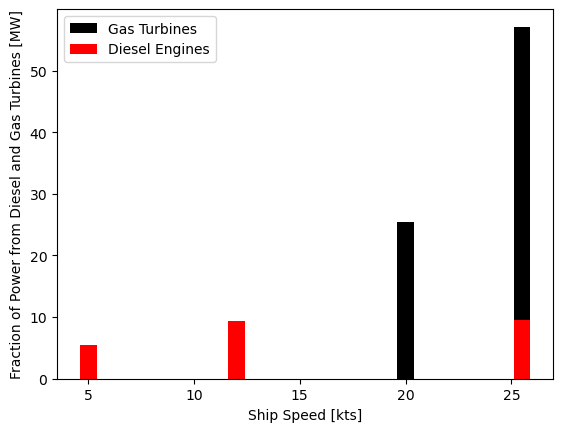

In [116]:
# plot power bar graphs
powers_titan = np.array([0, 0, break_powers[2], 2*P_titan_100])
powers_war = np.array([break_powers[0], break_powers[1], 0, break_powers[-1]-2*P_titan_100])

plt.bar(speeds, (powers_titan+powers_war)/1000, color='black', label='Gas Turbines')
plt.bar(speeds, powers_war/1000, color='red', label='Diesel Engines')

plt.xlabel('Ship Speed [kts]')
plt.ylabel('Fraction of Power from Diesel and Gas Turbines [MW]')
plt.legend()

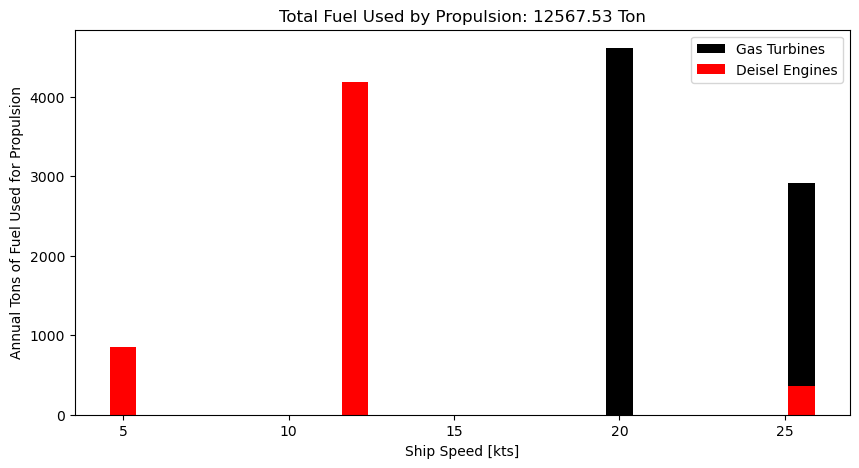

In [99]:
# plot the solution 
plt.figure(figsize=(10,5))
plt.bar(speeds, (m_war_annual+m_titan_annual)/1000, color='black', label='Gas Turbines')
plt.bar(speeds, m_war_annual/1000, color='red', label='Deisel Engines')

plt.xlabel('Ship Speed [kts]')
plt.ylabel('Annual Tons of Fuel Used for Propulsion')
plt.title(f'Total Fuel Used by Propulsion: {np.round(total_fuel/1000, 2)} Ton')
plt.legend()

[ 854753.472 4184618.544 4612769.37  2915393.13 ]


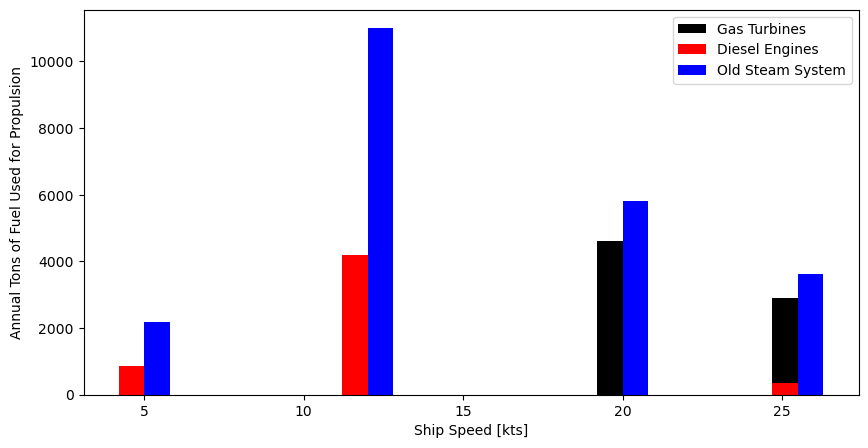

In [139]:
# compare fuel used 
width = .8
# plot the solution 
plt.figure(figsize=(10,5))
plt.bar(speeds-width/2, (m_war_annual+m_titan_annual)/1000, color='black', label='Gas Turbines', width=width)
plt.bar(speeds-width/2, m_war_annual/1000, color='red', label='Diesel Engines', width=width)
plt.bar(speeds+width/2, m_steam_annual/1000, color='blue', label='Old Steam System')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Annual Tons of Fuel Used for Propulsion')
plt.legend()
print(m_war_annual+m_titan_annual)

In [101]:
# Electrical power generation area
# As-is electrical generation 

P_avg_el = 4747 # kW
P_WB = 7272 # kW

num_war_elec = 5
num_diesel_elec = 2

# operation powers
P_war_elec_100 = 7*345
print('P_war_elec_100 = ', P_war_elec_100, ' kW')
P_diesel_elec_100 = 2000

endurance_percent = 0.9
winter_battle_percent = 1- endurance_percent

# Endurance speed section 
P_war_elec_avg = P_avg_el/(num_war_elec-1)
print(f'Power per war engine for endurance: {P_war_elec_avg} kW')
MCR_war_elec_avg = P_war_elec_avg/P_war_elec_100
print(f'MCR for war electric power plant at average load: {MCR_war_elec_avg}')

shift = 9
sfc_war_elec_avg = 180 + shift
print(f'sfc for war electric generator during endurance operation: {sfc_war_elec_avg}')
m_war_elec_avg = sfc_war_elec_avg/(1000*60**2)*P_avg_el*(num_days_underway*endurance_percent)*24*60**2
print(f'Total fuel used to supply deisel electric power generator at endurance: {m_war_elec_avg/1000} Ton')

print('\n-----')
# winter battle section 
P_war_elec_WB = P_WB/(num_war_elec-1)
print(f'Power per war engine for WB: {P_war_elec_WB} kW')
MCR_war_elec_WB = P_war_elec_WB/P_war_elec_100
print(f'MCR for war electric power plant at WB load: {MCR_war_elec_WB}')

sfc_war_elec_WB = 176 + shift
print(f'sfc for war electric generator during WB operation: {sfc_war_elec_WB}')
m_war_elec_WB = sfc_war_elec_WB/(1000*60**2)*P_WB*(num_days_underway*winter_battle_percent)*24*60**2
print(f'Total fuel used to supply war electric power generator WB: {m_war_elec_WB/1000} Ton')

# print('\n-----')
# print(f'Total fuel used by electric generators annually: {(m_steam_elec_WB + m_steam_elec_avg)/1000} Ton ')

# print('\n-----')
# m_grand_total_steam = m_steam_elec_WB + m_steam_elec_avg + mtot_steam
# print(f'Grand Total fuel used by ship: {(m_grand_total_steam)/1000} Ton ')

P_war_elec_100 =  2415  kW
Power per war engine for endurance: 1186.75 kW
MCR for war electric power plant at average load: 0.491407867494824
sfc for war electric generator during endurance operation: 189
Total fuel used to supply deisel electric power generator at endurance: 3546.3849624000004 Ton

-----
Power per war engine for WB: 1818.0 kW
MCR for war electric power plant at WB load: 0.7527950310559006
sfc for war electric generator during WB operation: 185
Total fuel used to supply war electric power generator WB: 590.864544 Ton


In [103]:
# emissions from the electric system 

CO2_war_elec = (m_war_elec_avg+m_war_elec_WB)*CO2_frac
print(f'Emitted CO2: {CO2_war_elec/1000} Ton')

SOx_war_elec = (m_war_elec_avg+m_war_elec_WB)*SOx_frac
print(f'Emitted SOx: {SOx_war_elec/1000} Ton')
print('\n-----')
# NOx emitted by the electic system 
# recall for the WB mass, the MCR = 0.727, and for the standard operation, MCR = 0.475
MCR_elec_war = np.array([MCR_war_elec_avg, MCR_war_elec_WB])
noxers_elec_war = MCR_elec_war*100*0.16 + 2
mass_used_elec = np.array([m_war_elec_avg, m_war_elec_WB])
mass_nox_elec_war = noxers_elec_war*mass_used_elec/1000**2 # mass of nox in Ton
print('electric MCRs: ', MCR_elec_war)
print('electric noxers: ', noxers_elec_war)
print('Mass of NOx emitted by electric generation in Ton: ', mass_nox_elec_war)
total_NOx_emission_elec_war = sum(mass_nox_elec_war)
print(f'Mass of NOx emitted total from electric: {total_NOx_emission_elec_war} Ton')

# print('\n------')
# print('Grand Total NOx in Ton: ', total_NOx_emission_elec+total_NOx_emission)

Emitted CO2: 12894.42762828 Ton
Emitted SOx: 82.74499012800001 Ton

-----
electric MCRs:  [0.49140787 0.75279503]
electric noxers:  [ 9.86252588 14.0447205 ]
Mass of NOx emitted by electric generation in Ton:  [34.97631347  8.29852737]
Mass of NOx emitted total from electric: 43.2748408438241 Ton


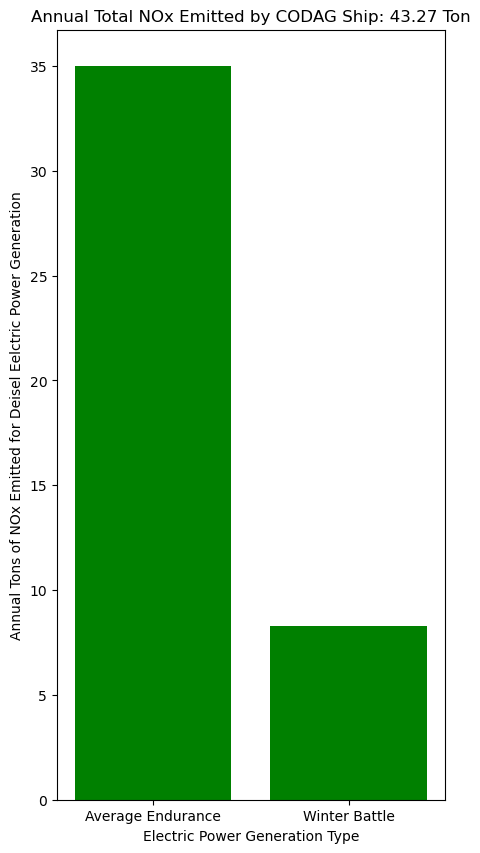

In [104]:
DayOfWeekOfCall = [1,2]

LABELS = ["Average Endurance", "Winter Battle"]
plt.figure(figsize=(5, 10))
plt.bar(DayOfWeekOfCall, mass_nox_elec_war, align='center', color='green')
plt.xticks(DayOfWeekOfCall, LABELS)
plt.xlabel('Electric Power Generation Type')
plt.ylabel('Annual Tons of NOx Emitted for Deisel Eelctric Power Generation')
plt.title(f'Annual Total NOx Emitted by CODAG Ship: {np.round(sum(mass_nox_elec_war), 2)} Ton')
plt.show()

In [107]:
# Totals with electric 
total_fuelWE = sum(m_war_annual) + sum(m_titan_annual) + m_war_elec_WB + m_war_elec_avg
print('Grand Total Fuel: ', total_fuelWE/1000, ' Ton')
total_CO2WE = sum(co2_annual) + CO2_war_elec
print('Grand Total CO2: ', total_CO2WE/1000, ' Ton')
total_SOxWE = sum(sox_annual) + SOx_war_elec
print('Grand Total SOx: ', total_SOxWE/1000, ' Ton')
total_NOxWE = sum(nox_annual) + total_NOx_emission_elec_war*1000
print('Grand Total NOx: ', total_NOxWE/1000, ' Ton')

# m_war_annual = np.zeros_like(break_powers)
# co2_annual = np.zeros_like(break_powers)
# sox_annual = np.zeros_like(break_powers)
# nox_annual = np.zeros_like(break_powers)

Grand Total Fuel:  16704.7840224  Ton
Grand Total CO2:  52063.243536480004  Ton
Grand Total SOx:  334.095680448  Ton
Grand Total NOx:  475.5293247780548  Ton


In [128]:
# differences 

fuel_diff = m_grand_total_steam - total_fuelWE
print('Total Annual Fuel Savings: ', fuel_diff/1000, 'Ton')

CO2_diff = total_CO2_emission_steam - total_CO2WE
print('Total Annual CO2 Savings: ', CO2_diff/1000, 'Ton')

SOx_diff = total_SOx_emission_steam - total_SOxWE
print('Total Annual SOx Savings: ', SOx_diff/1000, 'Ton')

NOx_diff = (total_NOx_emission_elec+total_NOx_emission)*1000 - total_NOxWE
print('Total Annual NOx Savings: ', NOx_diff/1000, 'Ton')

Total Annual Fuel Savings:  12218.548721399997 Ton
Total Annual CO2 Savings:  38081.14351502999 Ton
Total Annual SOx Savings:  244.37097442799993 Ton
Total Annual NOx Savings:  -234.86976702719153 Ton


In [132]:
print(total_NOx_emission_elec+total_NOx_emission)
print(total_NOxWE/1000)
print(NOx_diff/1000)

240.65955775086326
475.5293247780548
-234.86976702719153


[-42.24460863 -42.24460863 -42.24460863  97.59419872]


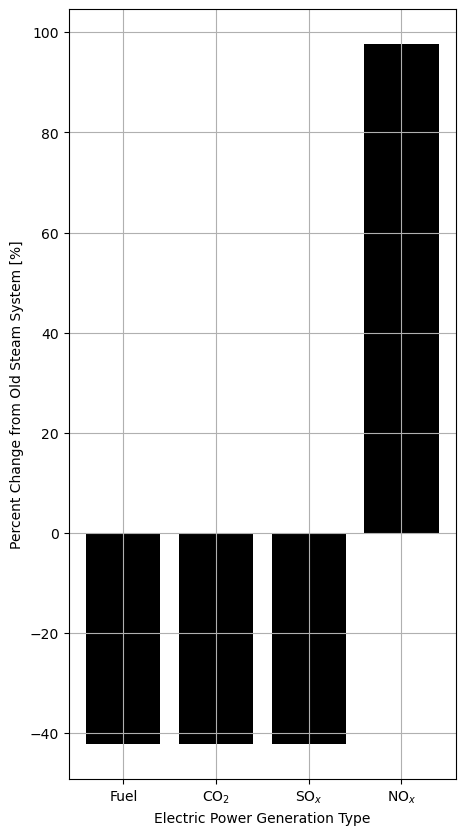

In [137]:
base = [1,2, 3,4]

LABELS = ['Fuel', r'CO$_2$', r'SO$_x$', r'NO$_x$']
plt.figure(figsize=(5, 10))
diff_percent = 100*np.array([-fuel_diff/m_grand_total_steam, -CO2_diff/total_CO2_emission_steam, -SOx_diff/total_SOx_emission_steam, -NOx_diff/(1000*total_NOx_emission_elec+1000*total_NOx_emission)])
print(diff_percent)
plt.bar(base, diff_percent, align='center', color='black', width=.8)
plt.grid()
plt.xticks(base, LABELS)
plt.xlabel('Electric Power Generation Type')
plt.ylabel('Percent Change from Old Steam System [%]')
plt.show()